In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


https://www.learnopencv.com/keras-tutorial-using-pre-trained-imagenet-models/

In [0]:
import keras
import numpy as np

from keras.applications import vgg16, inception_v3, resnet50, mobilenet

vgg_model = vgg16.VGG16(weights='imagenet')

inception_model = inception_v3.InceptionV3(weights='imagenet')

resnet_model = resnet50.ResNet50(weights='imagenet')

mobilenet_model = mobilenet.MobileNet(weights='imagenet')

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
102858752/102853048 [==============================] - 1s 0us/step
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
17227776/17225924 [==============================] - 0s 0us/step


In [0]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
filename = '/content/gdrive/My Drive/app/KerasApplicationforPre-trainedModel/image/cat.jpg'


PIL image size (224, 224)


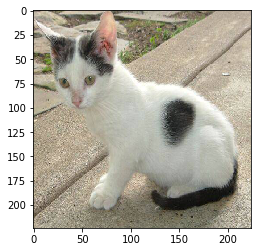

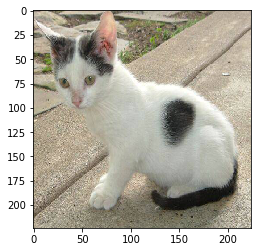

numpy array size (224, 224, 3)
image batch size (1, 224, 224, 3)


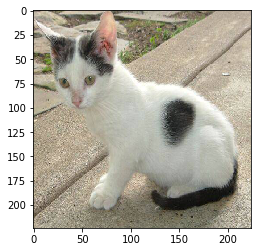

In [0]:
# load an image in PIL format
original = load_img(filename, target_size=(224, 224))
print('PIL image size',original.size)
plt.imshow(original)
plt.show()

# convert the PIL image to a numpy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)
numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
plt.show()
print('numpy array size',numpy_image.shape)

# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))


**Predictions using the various Network**

Preprocess the input by subtracting the mean value from each channel of the images in the batch. Mean is an array of three elements obtained by the average of R, G, B pixels of all images obtained from ImageNet
get the probabilities of occurrence for each class
convert the probabilities to human-readable labels


## **VGG16 Network**

In [0]:
# prepare the image for the VGG model
processed_image = vgg16.preprocess_input(image_batch.copy())

# get the predicted probabilities for each class
predictions = vgg_model.predict(processed_image)
# print predictions
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
label_vgg = decode_predictions(predictions)
label_vgg

40960/35363 [==================================] - 0s 1us/step


[[('n02123597', 'Siamese_cat', 0.3093419),
  ('n01877812', 'wallaby', 0.08034116),
  ('n02326432', 'hare', 0.07509854),
  ('n02325366', 'wood_rabbit', 0.050530784),
  ('n03223299', 'doormat', 0.04817361)]]

### **ResNet50 Network**

In [0]:
# prepare the image for the ResNet50 model
processed_image = resnet50.preprocess_input(image_batch.copy())

# get the predicted probabilities for each class
predictions = resnet_model.predict(processed_image)

# convert the probabilities to class labels
# If you want to see the top 3 predictions, specify it using the top argument
label_resnet = decode_predictions(predictions, top=3)
label_resnet

[[('n02124075', 'Egyptian_cat', 0.17055036),
  ('n02123597', 'Siamese_cat', 0.12245753),
  ('n03958227', 'plastic_bag', 0.11745573)]]

### **MobileNet Network**

In [0]:
# prepare the image for the MobileNet model
processed_image = mobilenet.preprocess_input(image_batch.copy())

# get the predicted probabilities for each class
predictions = mobilenet_model.predict(processed_image)

# convert the probabilities to imagenet class labels
label_mobilenet = decode_predictions(predictions)
label_mobilenet

[[('n03958227', 'plastic_bag', 0.15703699),
  ('n02124075', 'Egyptian_cat', 0.116973855),
  ('n02123597', 'Siamese_cat', 0.10532723),
  ('n02123045', 'tabby', 0.075648636),
  ('n02909870', 'bucket', 0.054681394)]]

### **Inception_V3 Network**

In [0]:
# load an image in PIL format
original = load_img(filename, target_size=(299, 299))

# Convert the PIL image into numpy array
numpy_image = img_to_array(original)

# reshape data in terms of batchsize
image_batch = np.expand_dims(numpy_image, axis=0)

# prepare the image for the Inception model
processed_image = inception_v3.preprocess_input(image_batch.copy())

# get the predicted probabilities for each class
predictions = inception_model.predict(processed_image)

# convert the probabilities to class labels
label_inception = decode_predictions(predictions)
label_inception

[[('n02124075', 'Egyptian_cat', 0.6622583),
  ('n02123045', 'tabby', 0.050285134),
  ('n02123597', 'Siamese_cat', 0.036381558),
  ('n02123159', 'tiger_cat', 0.023522384),
  ('n03223299', 'doormat', 0.015205678)]]

### **TỔNG HỢP**

In [0]:

import cv2
numpy_image = np.uint8(img_to_array(original)).copy()
numpy_image = cv2.resize(numpy_image,(900,900))

cv2.putText(numpy_image, "VGG16: {}, {:.2f}".format(label_vgg[0][0][1], label_vgg[0][0][2]) , (400, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.putText(numpy_image, "MobileNet: {}, {:.2f}".format(label_mobilenet[0][0][1], label_mobilenet[0][0][2]) , (400, 75), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.putText(numpy_image, "Inception: {}, {:.2f}".format(label_inception[0][0][1], label_inception[0][0][2]) , (400, 110), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.putText(numpy_image, "ResNet50: {}, {:.2f}".format(label_resnet[0][0][1], label_resnet[0][0][2]) , (400, 145), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
numpy_image = cv2.resize(numpy_image, (700,700))
cv2.imwrite("{}_output.jpg".format(filename.split('/')[-1].split('.')[0]),cv2.cvtColor(numpy_image, cv2.COLOR_RGB2BGR))

True

(-0.5, 699.5, 699.5, -0.5)

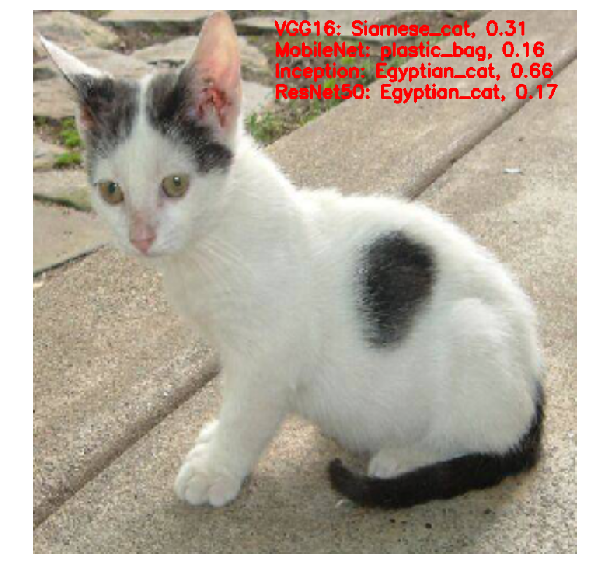

In [0]:
plt.figure(figsize=[10,10])
plt.imshow(numpy_image)
plt.axis('off')